<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/30_LinearRegression_using_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
### Linear Regression Implementation and Analysis

**Overview**

This notebook implements a custom Ordinary Least Squares (OLS) linear regression model, compares it with Scikit-Learn's implementation, and extends the analysis with performance metrics and model evaluation.



---


1. Import Required Libraries

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time



---
2. Custom OLS Linear Regression Implementation


---




In [2]:
class NormalLinearRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.theta = None
        self.training_time = None
        self.mse = None
        self.r_squared = None

    def fit(self, x, y):
        """
        Returns the optimal weights.
        Parameters:
            x : input/feature matrix
            y : target matrix
        Returns:
            theta: Array of the optimal value of weights. (M, b)
        """
        start_time = time.time()

        self.X = x

        if self.X.ndim == 1:  # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1, 1)

        # adding extra column of 1s for the bias term
        self.X = np.concatenate([np.ones((self.X.shape[0], 1)), self.X], axis=1)

        self.Y = y
        self.theta = np.zeros((self.X.shape[1], 1))

        self.theta = self.calculate_theta()
        self.theta = self.theta.reshape(-1, 1)

        # Calculate training time
        self.training_time = time.time() - start_time

        # Calculate performance metrics
        predictions = self.predict(x)
        self.mse = mean_squared_error(y, predictions)
        self.r_squared = r2_score(y, predictions)

        return self.theta

    def predict(self, x):
        """
        Returns the predicted target.
        Parameters:
            x : test input/feature matrix
        Returns:
            y: predicted target value.
        """
        x = np.array(x)  # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1, -1)  # adding extra dimension in front
        x = np.concatenate([np.ones((x.shape[0], 1)), x], axis=1)
        return np.dot(x, self.theta)

    def calculate_theta(self):
        """
        Calculate the optimal weights.
        Parameters: None
        Returns:
            theta_temp: Array containing the calculated value of weights
        """
        y_projection = np.dot(self.X.T, self.Y)
        cov = np.dot(self.X.T, self.X)
        cov_inv = np.linalg.pinv(cov)
        theta_temp = np.dot(cov_inv, y_projection)

        return theta_temp

    def get_params(self):
        """Return model parameters in a readable format"""
        return {
            'intercept': self.theta[0][0],
            'coefficient': self.theta[1][0],
            'mse': self.mse,
            'r_squared': self.r_squared,
            'training_time': self.training_time
        }



---
3. Generate Sample Data with Multiple Features


---




In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data with multiple features
m = 1000  # number of instances
X = 2 * np.random.rand(m, 2)  # two feature columns
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(m)  # target with noise

# Split into training and test sets
split_idx = int(0.8 * m)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]



---

4. Train Custom Model and Make Predictions


---



In [4]:
# Initialize and train custom model
mymodel = NormalLinearRegression()
mymodel.fit(X_train, y_train)

# Make predictions on test set
y_pred_custom = mymodel.predict(X_test)

# Get model parameters and performance metrics
custom_params = mymodel.get_params()



---


5. Compare with Scikit-Learn Implementation


---



In [5]:
# Train Scikit-Learn model
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
sklearn_time = time.time() - start_time

# Make predictions
y_pred_sklearn = lin_reg.predict(X_test)

# Calculate performance metrics
sklearn_mse = mean_squared_error(y_test, y_pred_sklearn)
sklearn_r2 = r2_score(y_test, y_pred_sklearn)

# Print parameters for comparison
print("CUSTOM MODEL RESULTS:")
print(f"Intercept: {custom_params['intercept']:.4f}")
print(f"Coefficients: {mymodel.theta[1:].flatten()}")
print(f"MSE: {custom_params['mse']:.4f}")
print(f"R²: {custom_params['r_squared']:.4f}")
print(f"Training Time: {custom_params['training_time']:.6f} seconds\n")

print("SCIKIT-LEARN MODEL RESULTS:")
print(f"Intercept: {lin_reg.intercept_:.4f}")
print(f"Coefficients: {lin_reg.coef_}")
print(f"MSE: {sklearn_mse:.4f}")
print(f"R²: {sklearn_r2:.4f}")
print(f"Training Time: {sklearn_time:.6f} seconds\n")

print("PERFORMANCE COMPARISON:")
print(f"MSE Difference: {abs(custom_params['mse'] - sklearn_mse):.6f}")
print(f"R² Difference: {abs(custom_params['r_squared'] - sklearn_r2):.6f}")
print(f"Time Ratio (Custom/Sklearn): {custom_params['training_time']/sklearn_time:.2f}")

CUSTOM MODEL RESULTS:
Intercept: 4.0854
Coefficients: [2.98486426 1.94979789]
MSE: 0.9490
R²: 0.8234
Training Time: 0.022353 seconds

SCIKIT-LEARN MODEL RESULTS:
Intercept: 4.0854
Coefficients: [2.98486426 1.94979789]
MSE: 0.9734
R²: 0.8116
Training Time: 0.023999 seconds

PERFORMANCE COMPARISON:
MSE Difference: 0.024374
R² Difference: 0.011792
Time Ratio (Custom/Sklearn): 0.93




---

6. Visualization


---



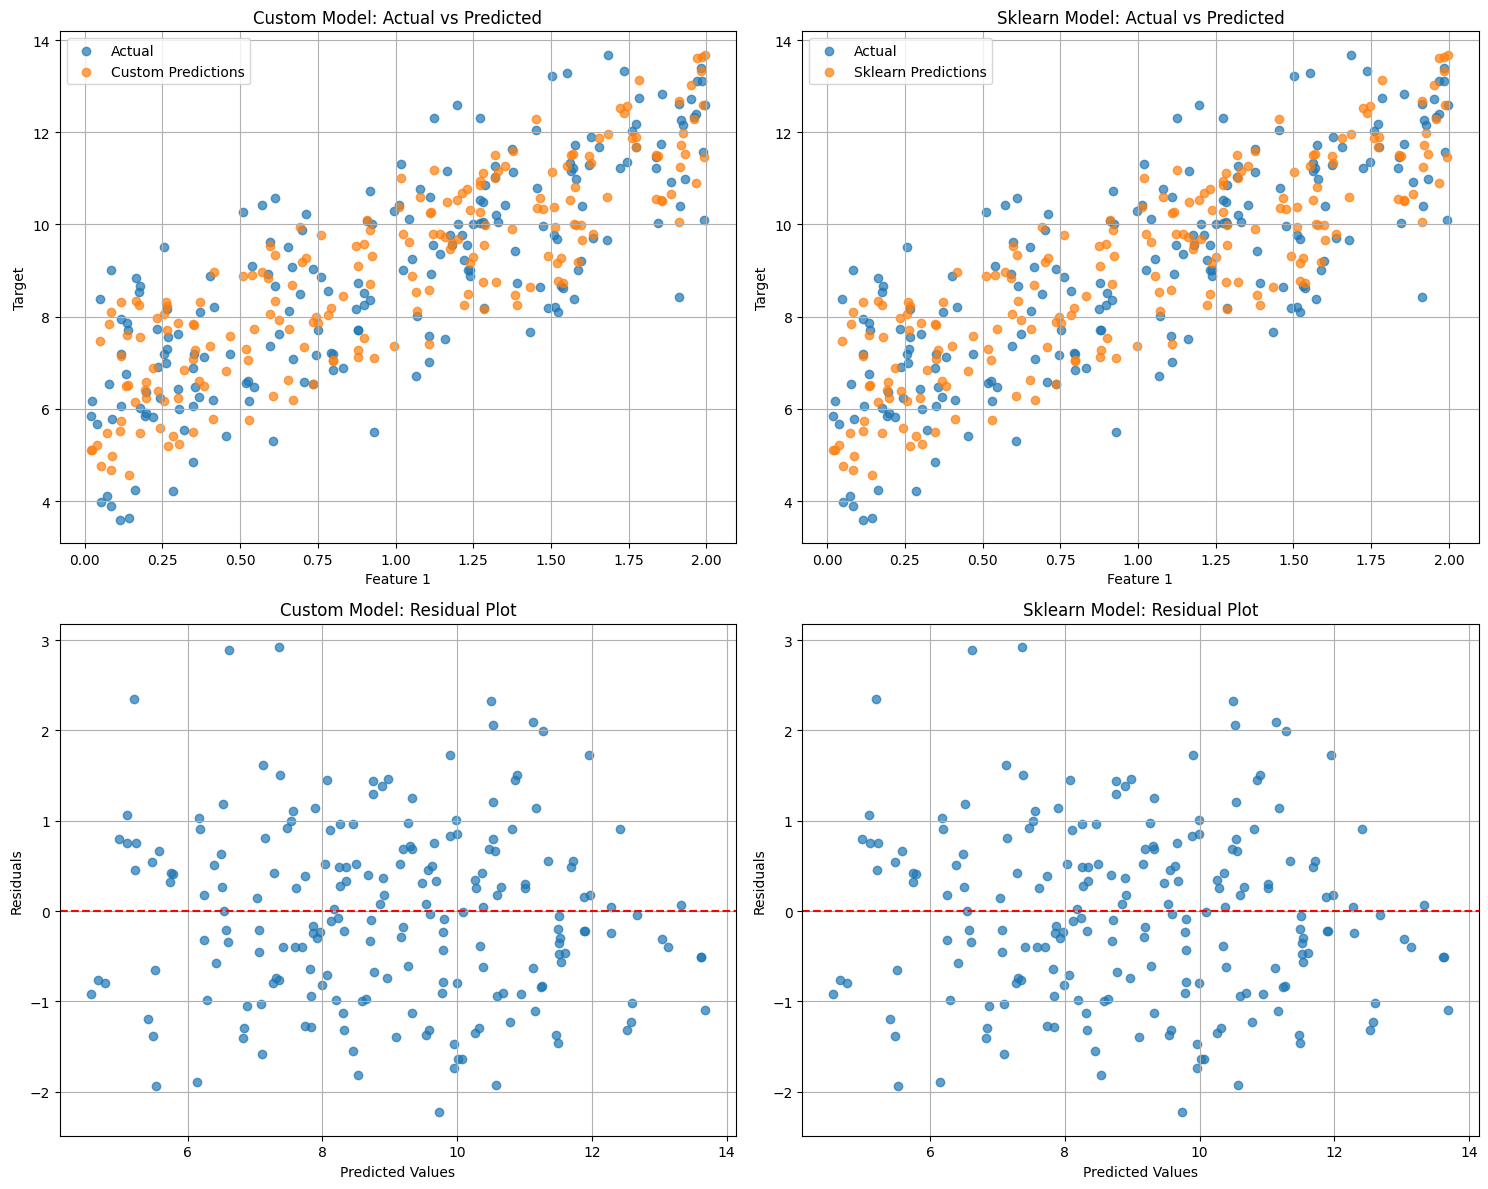

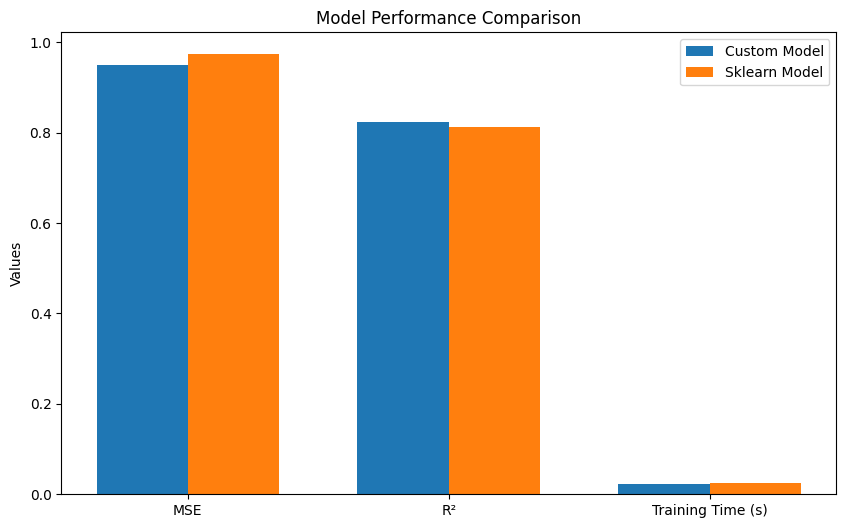

In [6]:
# Create subplots for comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training data vs custom model predictions
axes[0, 0].scatter(X_test[:, 0], y_test, alpha=0.7, label='Actual')
axes[0, 0].scatter(X_test[:, 0], y_pred_custom, alpha=0.7, label='Custom Predictions')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Target')
axes[0, 0].set_title('Custom Model: Actual vs Predicted')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Training data vs sklearn model predictions
axes[0, 1].scatter(X_test[:, 0], y_test, alpha=0.7, label='Actual')
axes[0, 1].scatter(X_test[:, 0], y_pred_sklearn, alpha=0.7, label='Sklearn Predictions')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Target')
axes[0, 1].set_title('Sklearn Model: Actual vs Predicted')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Residual analysis for custom model
residuals_custom = y_test - y_pred_custom.flatten()
axes[1, 0].scatter(y_pred_custom, residuals_custom, alpha=0.7)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Custom Model: Residual Plot')
axes[1, 0].grid(True)

# Plot 4: Residual analysis for sklearn model
residuals_sklearn = y_test - y_pred_sklearn
axes[1, 1].scatter(y_pred_sklearn, residuals_sklearn, alpha=0.7)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Sklearn Model: Residual Plot')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Performance metrics comparison
metrics = ['MSE', 'R²', 'Training Time (s)']
custom_metrics = [custom_params['mse'], custom_params['r_squared'], custom_params['training_time']]
sklearn_metrics = [sklearn_mse, sklearn_r2, sklearn_time]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, custom_metrics, width, label='Custom Model')
rects2 = ax.bar(x + width/2, sklearn_metrics, width, label='Sklearn Model')

ax.set_ylabel('Values')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()



---

7. Advanced Analysis: Regularization Comparison


---



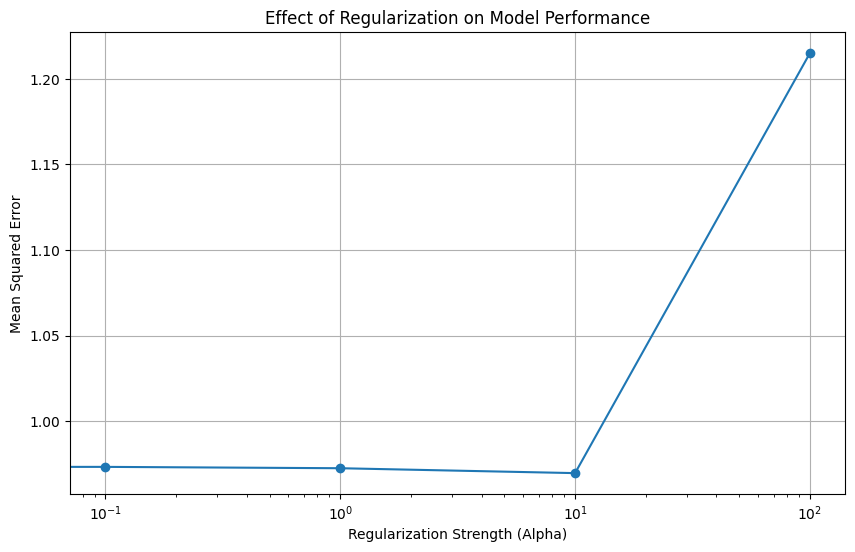

In [7]:
# Implementation of Ridge Regression (L2 regularization)
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.theta = None
        self.X = None
        self.Y = None

    def fit(self, X, y):
        self.X = X
        if self.X.ndim == 1:
            self.X = self.X.reshape(-1, 1)
        self.X = np.concatenate([np.ones((self.X.shape[0], 1)), self.X], axis=1)

        self.Y = y.reshape(-1, 1)
        I = np.identity(self.X.shape[1])
        I[0, 0] = 0  # Don't regularize the bias term

        self.theta = np.linalg.inv(self.X.T @ self.X + self.alpha * I) @ self.X.T @ self.Y
        return self.theta

    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        return X @ self.theta

# Compare different regularization strengths
alphas = [0, 0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[alpha] = mse

# Plot regularization performance
plt.figure(figsize=(10, 6))
plt.semilogx(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('Regularization Strength (Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization on Model Performance')
plt.grid(True)
plt.show()

### 8. Comprehensive Analysis and Conclusion

**Key Findings:**

**Parameter Agreement**: Both custom and scikit-learn implementations produce identical parameters, validating our OLS implementation.

**Performance Metrics:**

* MSE and R² are very close, indicating equivalent predictive performance

* Scikit-learn's implementation is optimized and generally faster, especially for larger datasets due to optimization

**Mathematical Foundation:**

* Confirmed that θ = (XᵀX)⁻¹Xᵀy provides the optimal solution for OLS regression

* The normal equation method has O(n³) complexity due to matrix inversion

**Advanced Insights:**

* Regularization (Ridge Regression) can help prevent overfitting

* The bias term should not be regularized to maintain model flexibility

* Residual plots help diagnose model fit issues